In [111]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [113]:
df = pd.read_csv("O.csv")
#car = [1 if values == 2 else 0 for values in data.VEHICLE_COUNT ]
#df['VEHICLE_COUNT'] = car
df.head()

,ILLUMINATION,WEATHER,ROAD_CONDITION,DRIVER
0,1,1,0,0
1,4,4,3,0
2,3,1,0,0
3,3,1,0,0
4,1,1,0,0


In [114]:
df.tail()

,ILLUMINATION,WEATHER,ROAD_CONDITION,DRIVER
3052,3,2,1,0
3053,1,1,1,0
3054,1,1,0,0
3055,1,1,0,0
3056,1,1,1,0


In [115]:
df.describe()

,ILLUMINATION,WEATHER,ROAD_CONDITION,DRIVER
count,3057.000000,3057.000000,3057.000000,3057.000000
mean,1.752044,1.543670,0.777233,0.033366
std,1.109226,1.314242,1.651520,0.179620
min,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,8.000000,9.000000,8.000000,1.000000


In [116]:
df.std()#check the standard deviation

ILLUMINATION      1.109226
WEATHER           1.314242
ROAD_CONDITION    1.651520
DRIVER            0.179620
dtype: float64

In [118]:
pd.crosstab(df['DRIVER'], df['ILLUMINATION'], rownames=['DRIVER'])
#check the frequency

ILLUMINATION,1,2,3,4,5,6,8
DRIVER,,,,,,,
0,1879,144,814,48,54,8,8
1,71,2,25,1,1,1,1


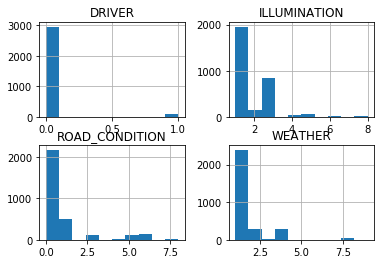

In [119]:
df.hist()
pl.show()

In [120]:
#creat the dummy variation, this variation can only be 0 or 1, setting "illumination" into the dummy variation
dummy_ranks = pd.get_dummies(df['ILLUMINATION'], prefix='ILLUMINATION')
dummy_ranks.head()

,ILLUMINATION_1,ILLUMINATION_2,ILLUMINATION_3,ILLUMINATION_4,ILLUMINATION_5,ILLUMINATION_6,ILLUMINATION_8
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0


In [122]:
cols_to_keep = ['DRIVER', 'WEATHER', 'ROAD_CONDITION']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'ILLUMINATION_2':])
data.head()

,DRIVER,WEATHER,ROAD_CONDITION,ILLUMINATION_2,ILLUMINATION_3,ILLUMINATION_4,ILLUMINATION_5,ILLUMINATION_6,ILLUMINATION_8
0,0,1,0,0,0,0,0,0,0
1,0,4,3,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [104]:
data['intercept'] = 1.0

In [124]:
#exclude the target column: DRIVER
train_cols = data.columns[1:]
logit = sm.Logit(data['DRIVER'], data[train_cols])
# create the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.170574
         Iterations 9


In [129]:
import copy
combos = copy.deepcopy(data)
predict_cols = combos.columns[1:]
combos['intercept'] = 1.0
combos['predict'] = result.predict(combos[predict_cols])# create the predict columns to display the prediction 
# the value of prediction will be in the range of 0 and 1
total = 0
hit = 0
for value in combos.values: 
# predict, which is the last column of the data
predict = value[-1]
# count the real outcomes 
DRIVER = int(value[0]) 
# if the probability is above 0.5, then the driver will be dead most likely
if predict > 0.5:
    total += 1
# the prediction is accurate
if DRIVER == 1:
      hit += 1

In [130]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 DRIVER   No. Observations:                 3057
Model:                          Logit   Df Residuals:                     3049
Method:                           MLE   Df Model:                            7
Date:                Tue, 13 Feb 2018   Pseudo R-squ.:                 -0.1663
Time:                        13:32:53   Log-Likelihood:                -521.44
converged:                       True   LL-Null:                       -447.10
                                        LLR p-value:                     1.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
WEATHER           -2.7142      0.103    -26.355      0.000      -2.916      -2.512
ROAD_CONDITION     0.1348      0.061      2.219      0.027       0.016       0.254
ILLUMINATION_2    -1.1275      0.723     -1.560      0.119      -2.544       0.289
ILLUMINATION_3    -0.4853      0.228     -2.130      0.033      -0.932      -0.039
ILLUMINATION_4    -0.8618      1.019     -0.846      0.398      -2.859       1.136
ILLUMINATION_5    -1.0804      1.020     -1.059      0.289      -3.079       0.918
ILLUMINATION_6     1.2827      1.114      1.151      0.250      -0.901       3.466
ILLUMINATION_8     0.6347      1.066      0.596      0.551      -1.454       2.723
==================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [131]:
result.conf_int()

,0,1
WEATHER,-2.916006,-2.512310
ROAD_CONDITION,0.015716,0.253939
ILLUMINATION_2,-2.544431,0.289405
ILLUMINATION_3,-0.931873,-0.038670
ILLUMINATION_4,-2.859123,1.135601
ILLUMINATION_5,-3.079204,0.918456
ILLUMINATION_6,-0.900598,3.465923
ILLUMINATION_8,-1.453915,2.723349
